### Movie Data Analysis: IMDB + Metacritics Dataset(2015)

In [3]:
import json

# Opening json file containing the secret key
# 'with; ensures file is properly closed after reading 
with open ('C:/Users/natha/Downloads/My_Secret.json') as f:
    # Load the JSON data from the file and convert it into Python dictionary 
    data = json.load(f)

    # Extract the value associated with the key 'mongodb'
    secret_key = data['mongodb']

# Print the lenght of the secret key without revealing the key itself 
print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 69 characters in length.


In [4]:
import pandas
import re 
import pymongo
import certifi

# Connecting to MongoDB database using the secret key
# The tlsCAFile argument ensures the connection uses a trusted certification for security
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Accesing the database name "DATA320"
db = client.DATA320

# List and print all collections insides the database
allCollections = db.list_collection_names()
print(allCollections)

# Loading documents from the 'IMDB_Pipeline_View' collection into another DataFrame
# Only include movies released in the year 2015
imdb_view = pandas.DataFrame(db.IMDB_Pipeline_View.find({"release_year": 2015 }))

# Loading document form 'Metacritic' collection into another DataFrame
# Using a regex pattern to match all documents whose 'release_date' are in the year 2015
metacritic_view = pandas.DataFrame(db.Metacritic.find({"release_date": re.compile("2015") }))

# Convert the 'score' column in the Metacritic data to numeric values
# Invalid or missing entries will be replaced with Nan (not a number)
metacritic_view.score = pandas.to_numeric(metacritic_view.score, errors = 'coerce')

# Convert the 'release_dare' column to proper datetime objects
# Invalid or unrecognized dates will be replace with Nat (not a time)
metacritic_view.release_date = pandas.to_datetime(metacritic_view.release_date, errors = 'coerce')

['IMDB_Fixed', 'imdb', 'Metacritic', 'IMDB_View', 'IMDB_Pipeline_View']


In [6]:
# Merged IMDB and Metacritic DataFrames into a single unified view
unified_view = pandas.merge(imdb_view, metacritic_view, how = "inner", on = "title")

# Print the first few rows of the merged dataframe
unified_view.head()

,_id_x,budget,cast,certification,company,director,genres,gross_sales,id,opening_weekend,...,votes_num,release_year,release_month,release_day,_id_y,movie_id,release_date_y,description,score,thumbnail
0,637fd8d9a23f8f7c1aca9f13,"$110,000,000 (estimated)","Dwayne Johnson, Carla Gugino, Alexandra Daddar...",PG-13,"New Line Cinema, Village Roadshow Pictures, Ra...",Brad Peyton,"Action, Adventure, Thriller","$473,990,832",2126355,"$54,588,173, 31 May 2015",...,238760,2015,5,21,68210d08bc881ed09289d794,18977,2015-05-29,After the infamous San Andreas Fault finally g...,43,https://static.metacritic.com/images/products/...
1,637fd8dea23f8f7c1aca9f14,"$245,000,000 (estimated)","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",PG-13,"Lucasfilm, Bad Robot, Walt Disney Pictures",J.J. Abrams,"Action, Adventure, Sci-Fi","$2,068,223,624, 10 Jul 2016",2488496,"$247,966,675, 20 Dec 2015",...,928791,2015,12,14,68210d08bc881ed09289d5e1,18542,2015-12-18,"Thirty years after the Battle of Endor, a new ...",80,https://static.metacritic.com/images/products/...
2,637fd8e0a23f8f7c1aca9f15,"$15,000,000 (estimated)","Emjay Anthony, Adam Scott, Toni Collette, Stef...","TV-14::(DLV), PG-13","Legendary Entertainment, Universal Pictures, S...",Michael Dougherty,"Comedy, Drama, Fantasy, Horror",None,3850590,"$16,293,325, 06 Dec 2015",...,73800,2015,11,30,68210d08bc881ed09289d766,18931,2015-12-04,When his dysfunctional family clashes over the...,49,https://static.metacritic.com/images/products/...
3,637fd9b2a23f8f7c1aca9f59,"$61,000,000 (estimated)","Dylan O'Brien, Ki Hong Lee, Kaya Scodelario, T...",PG-13,"Gotham Group, TSG Entertainment, Temple Hill E...",Wes Ball,"Action, Adventure, Sci-Fi, Thriller","$312,325,103",4046784,"$30,316,510, 20 Sep 2015",...,251819,2015,9,1,68210d08bc881ed09289d793,18976,2015-09-18,Thomas (Dylan O’Brien) and his fellow Gladers ...,43,https://static.metacritic.com/images/products/...
4,637fd9f0a23f8f7c1aca9f70,"$50,000,000 (estimated)","Liam Neeson, Ed Harris, Joel Kinnaman, Boyd Ho...",R,"Warner Bros., RatPac-Dune Entertainment, Verti...",Jaume Collet-Serra,"Action, Crime, Thriller","$71,561,644",2199571,"$11,012,305, 15 Mar 2015",...,110146,2015,3,9,68210d08bc881ed09289d6f6,18819,2015-03-13,Brooklyn mobster and prolific hit man Jimmy Co...,59,https://static.metacritic.com/images/products/...


In [7]:
# Import the OLS regression module from statsmodels
import statsmodels.formula.api

# Create and fit a Linear Regression Model to predict the gross_sales_usd
ols_model = statsmodels.formula.api.ols(
    formula = "gross_sales_usd ~ user_rating + budget_usd + opening_weekend_usd + votes + runtime",
    data = unified_view).fit()

# Print the model summary with coefficients and statistics
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        gross_sales_usd   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     201.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.50e-36
Time:                        15:45:13   Log-Likelihood:                -1327.2
No. Observations:                  67   AIC:                             2666.
Df Residuals:                      61   BIC:                             2680.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.074e+07   1

In [8]:
import transformers

# Choose a pre-trained sentiment analysis model from Cardiffnlp
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Create a sentiment analysis pipeline using the model and its tokenizer
sentiment_analyzer = transformers.pipeline(
    "sentiment-analysis",
    model=MODEL,
    tokenizer=transformers.AutoTokenizer.from_pretrained(MODEL)
)

# Map model output lables to human-readable sentiment categories
label_map = {
    'LABEL_0': 'negative',
    'LABEL_1': 'neutral',
    'LABEL_2': 'positive'
}

# Example movie review texts to analyze
texts = [
    "Spy 2015 is a very funny movie.",
    "Action movies are the best!",
    "Horror movies are scary."
]

# Loop through each text, analyze sentiment, and print the result 
for text in texts:
    result = sentiment_analyzer(text)[0]
    print(f"{text} → {label_map[result['label']]} ({result['score']:.2f})")



Device set to use cpu


Spy 2015 is a very funny movie. → positive (0.96)
Action movies are the best! → positive (0.99)
Horror movies are scary. → negative (0.93)


C:\Users\natha\AppData\Local\Temp\ipykernel_14072\3926681545.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


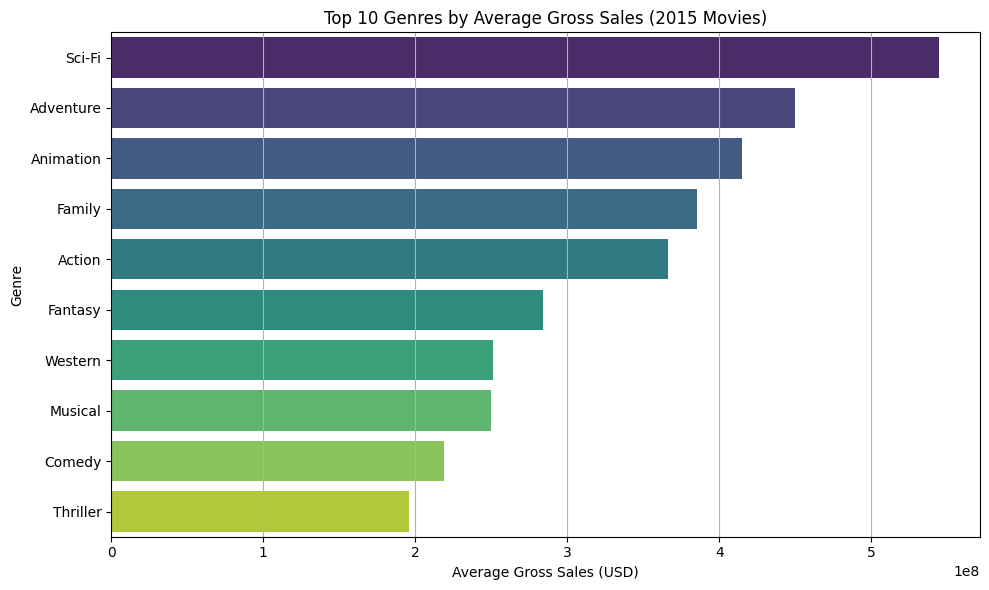

In [9]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Remove rows with missing 'gross_sales_usd' or 'genre' values
genre_data = unified_view.dropna(subset=["gross_sales_usd", "genres"]).copy()

# Split multipes genres in each row into a list
genre_data["genres"] = genre_data["genres"].str.split(", ")

# Expand the list of genres so each movie genre pair becomes its own rows
genre_exploded = genre_data.explode("genres")

# Calculate the average gross sales for each group
# Sort from the highest to lowesr and keep only the top 10 genres
top_genres = genre_exploded.groupby("genres")["gross_sales_usd"].mean().sort_values(ascending=False).head(10)


# Set figure size 
plt.figure(figsize=(10,6))

# Create a horizontal bar chart of the top 10 genres by average gross sales
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")

# Add the titles and Axis labels
plt.title("Top 10 Genres by Average Gross Sales (2015 Movies)")
plt.xlabel("Average Gross Sales (USD)")
plt.ylabel("Genre")

# Add grid lines for easier reading
plt.grid(True, axis='x')

# Adjust layout to prevent label overlap
plt.tight_layout()
plt.show()

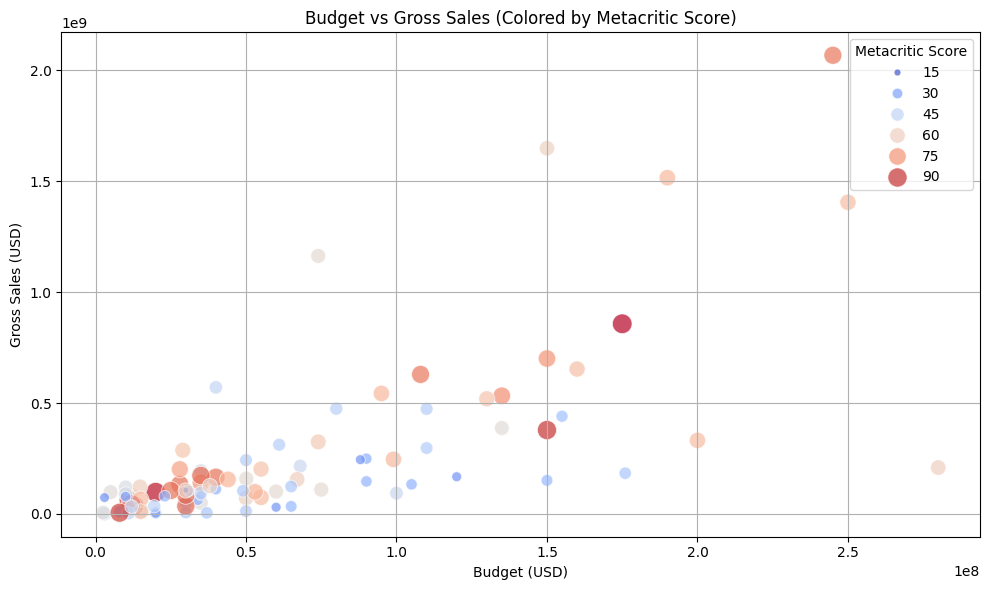

In [10]:
# Define a function to convert money strings into numeric values 
def parse_money(m):
    # Check if the value is a string to avoud errors on non-string data
    if isinstance(m, str):
        # Remove '$' and ',' symbols, then take the first numeric part if the string contains a dollar sign
        return float(m.replace('$','').replace(',','').split(' ')[0]) if '$' in m else None
    # Return none if input is not a string
    return None

# Apply the pare_money function to clean and convert the 'budget' and 'gross_sales' columns
unified_view["budget_usd"] = unified_view["budget"].apply(parse_money)
unified_view["gross_sales_usd"] = unified_view["gross_sales"].apply(parse_money)

# Drop missing values for plot
money_data = unified_view.dropna(subset=["budget_usd", "gross_sales_usd"])

# set figure size
plt.figure(figsize=(10,6))

# Plot a scatterplot where eacch point represents a movie
# Color and size points by Metracritic 'score' to show performance differences
sns.scatterplot(data=money_data, x="budget_usd", y="gross_sales_usd", hue="score", palette="coolwarm", size="score", sizes=(20, 200), alpha=0.7)

# Add plot titlt and axis Labels
plt.title("Budget vs Gross Sales (Colored by Metacritic Score)")
plt.xlabel("Budget (USD)")
plt.ylabel("Gross Sales (USD)")

# Add a legend for Metacritic scores and enable grid lines
plt.legend(title="Metacritic Score")
plt.grid(True)

# Adjust layout to prevent overlapping elements 
plt.tight_layout()
plt.show()

In [11]:
#Import number class
from numbers import Number

# Define a function to format large currency amounts into human-readable strings
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

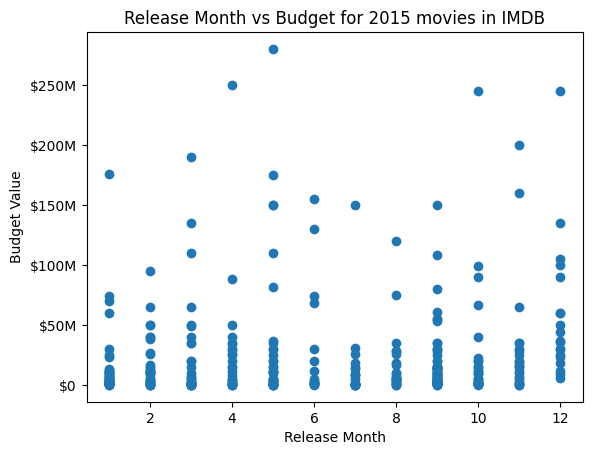

In [12]:
from matplotlib import pyplot
import numpy

# Filter the IMDB dataset to include only movies released in 2015
selected_films = imdb_view[imdb_view['release_year'] == 2015]


pyplot.title('Release Month vs Budget for 2015 movies in IMDB')
pyplot.scatter(selected_films['release_month'], selected_films['budget_usd'])
pyplot.xlabel('Release Month')
pyplot.ylabel('Budget Value')

# Format the y-axis ticks using the custom currency formatter
pyplot.gca().yaxis.set_major_formatter(format_currency) 

### __Analysis & Conclusion - 2015 Movie Data(IMDB & Metacritic)__

From the 2015 movie data pulled from IMDB and Metacritic, several interesting patterns emerge:

### Budget vs Gross Sales

The scatter plot of bidget versus gross sales, with bubble size and color representing Metacritics scores, reveals a cleas overall trend: higher budget films generally earn more at the box office.   However, this trend is not absolute. Several mid-budget films (e.g., under $50 million) achieved remarkable commercial success, suggesting that smart production and strong audience interest can outperform raw spending.

Interestingly, critical reception does not always perfectly align with financial peformance. Several movies with moderate scores (around 50-60) still generated of hundreds of millions in revenue, likely due to strong marketing and popular franchise appeal.

### Genre Impact

In our genre analysis, "Sci-fi", “Adventure”, “Animation”, and "Family" stood out as the most commercially successful genres on average. These genres typically have wide audience appeal and benefit from global releases, which helps boost their total revenue. On the other hand, genres like “Thriller” and “Comedy”, while popular, tend to generate less revenue per film.

### Release Timing

The Scatter plot of budget by release month shows some seasonal patterns in production and release strategies. While budgets are apread throughout the year, summer and holiday periods tend to feature higher-budget releases, aligning with traditional blockbuster seasons adn maximizing potential audience turnout.

### Takeaway

- Big budgets often bring bigger returns, but smart mid-bidget films can also succeed
- Critical scores are not always predictive of commercial performance.
- High-energy and family-oriented genres dominate box office revenue.
- Release timing matter, with summer and holiday seasons favoring higher-budget launches.

